# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('C:\Various Files\DataScience\EDA_human_temperature\EDA_human_temperature\data\human_body_temperature.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


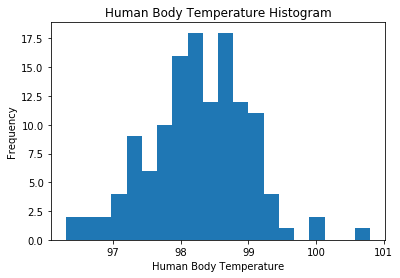

In [5]:
import matplotlib.pyplot as plt
_ = plt.hist( df['temperature'], bins =20)
_ = plt.title('Human Body Temperature Histogram')
_ = plt.xlabel('Human Body Temperature')
_ = plt.ylabel('Frequency')
plt.show()

In [6]:
from scipy.stats import shapiro
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Normal Distribution (fail to reject H0)')
else:
    print('Sample does not look Normal Distribution (reject H0)')

Statistics=0.987, p=0.233
Sample looks Normal Distribution (fail to reject H0)


#### 1. Is the distribution of body temperatures normal?

- Yes, the pvalue (~23.3%) reported by Shapiro–Wilk normality test is larger than the 5% significance level. A histogram plot is also provided here.

#### 2. Is the sample size large? Are the observations independent? 

- Yes, the sample size is larger than 30 and hence large enough. 
- Yes, each observation is an individual person independent of any others.

In [7]:
def bootstrap_replicate_1d(data, func): #from DataCamp Exercise
    return func(np.random.choice(data, size=len(data)))

In [8]:
def draw_bs_reps(data, func, size=1): #from DataCamp Exercise
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [9]:
import numpy as np
np.random.seed(20)
bs_mean_replicates = draw_bs_reps(df.temperature, np.mean, 1000)
conf_int = np.percentile(bs_mean_replicates, [0.5,99.5])
print ('99% bootstrap hypothesis test confidence interval =', conf_int, 'F Degrees')

99% bootstrap hypothesis test confidence interval = [98.08146923 98.41773846] F Degrees


In [10]:
import scipy.stats as st
import math
z_critical = st.norm.ppf(q = (1 - (1 - 0.99)/2))
pop_std = df.temperature.std()
margin_of_error = z_critical * (pop_std/math.sqrt(df.temperature.size))
z_conf_int = (df.temperature.mean() - margin_of_error, df.temperature.mean() + margin_of_error)
print ('99% z statistic confidence interval =', z_conf_int, 'F Degrees')

99% z statistic confidence interval = (98.08359356799211, 98.41486797046944) F Degrees


In [11]:
t_critical = st.t.ppf(q = (1 - (1 - 0.99)/2), df=(130 -1))
sample_std = df.temperature.std()
margin_of_error_t = t_critical * (sample_std/math.sqrt(df.temperature.size))
t_conf_int = (df.temperature.mean() - margin_of_error_t, df.temperature.mean() + margin_of_error_t)
print ('99% t statistic confidence interval =', t_conf_int, 'F Degrees')

99% t statistic confidence interval = (98.08110824239759, 98.41735329606396) F Degrees


#### 3. Is the true population mean really 98.6 degrees F? 
First, try a bootstrap hypothesis test. 
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
In this situation, is it appropriate to use the t or z statistic? 
Now try using the other test. How is the result be different? Why? 

- No, based on a bootstrap hypothesis test, the 99% confidence interval is (98.08146923, 98.41773846) F Degrees. 98.6 does not fall into this interval.
- This is a one sample test because it is one sample against one value.
- It is appropriate to use either t or z statistic because the sample size is large enough. Based on the above results, the 99% confidence intervals are very close.

In [12]:
sample = np.random.choice(df.temperature, size = 10)

In [13]:
margin_of_error_small = z_critical * (pop_std/math.sqrt(sample.size))
z_conf_int_small = (sample.mean() - margin_of_error_small, sample.mean() + margin_of_error_small)
print ('99% z statistic confidence interval for small sample =', z_conf_int_small, 'F Degrees')

99% z statistic confidence interval for small sample = (97.44278657780964, 98.63721342219034) F Degrees


In [14]:
t_critical = st.t.ppf(q = (1 - (1 - 0.99)/2), df=9)
sample_std = sample.std()
margin_of_error_t_small = t_critical * (sample_std/math.sqrt(sample.size))
t_conf_int_small = (sample.mean() - margin_of_error_t_small, sample.mean() + margin_of_error_t_small)
print ('99% t statistic confidence interval for small sample =', t_conf_int_small, 'F Degrees')

99% t statistic confidence interval for small sample = (97.49001874063883, 98.58998125936115) F Degrees


#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the t and z statistic? 

- The t statistic is more appropriate because the sample size is not large enough (<30)
- Based on the 99% confidence intervals for these two tests, the one with the t statistic broader than that with the z statistic. Given the small sample size, the t statistic should be used.

#### 5. At what temperature should we consider someone's temperature to be "abnormal"? 
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

- 99% bootstrap hypothesis test confidence interval = (98.081,  98.418) F Degrees. If someone's temperature is beyond this range, it may be consider to be "abnormal".
- with the z statistic, 99% z statistic confidence interval = (98.084, 98.415) F Degrees, we can reach more or less the same conclusion.

In [15]:
male_sample = df[df['gender'] == 'M'].temperature
female_sample = df[df['gender'] == 'F'].temperature

In [16]:
male_sample.mean()

98.1046153846154

In [17]:
female_sample.mean()

98.39384615384613

In [18]:
Z_val = (male_sample.mean() - female_sample.mean())/(math.sqrt(male_sample.var()/male_sample.size + female_sample.var()/female_sample.size))

In [19]:
z_critical = st.norm.ppf(q = (1 - (1 - 0.95)/2))

In [20]:
print('Z_val=%.3f, z_critical=%.3f' % (Z_val, z_critical))
if abs(Z_val) < z_critical:
    print('the absolute value of Z_val < z_critical (fail to reject H0)')
else:
    print('the absolute value of Z_val < z_critical (reject H0)')

Z_val=-2.285, z_critical=1.960
the absolute value of Z_val < z_critical (reject H0)


#### 6. Is there a significant difference between males and females in normal temperature? 
What testing approach did you use and why? 
Write a story with your conclusion in the context of the original problem. 

- Based on the testing (at 99% confidence level), the NULL hypothese of males and females having the same normal temperature is stastistically rejected.
- Hypothese testing of the difference between two sample means is used because we need to test if the temperature means for mals and femals are the same. In addition, the sample size is large enough (> 30)

- Sample a number of people for their body temperature can lead us to understand the distribution of human body temperature by assuming that each observation is independent of others. With the above analyses,
    a. the distribution of the human body temperature looks normal distribution.
    b. the number of samples should be large enough (> 30). Otherwise, the confidence interval will become wider.
    c. With 99% confidence level, the true population mean should fall into (98.081,  98.418) F Degrees
    d. The male temperature and the female temperature are statistically not the same.